In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools

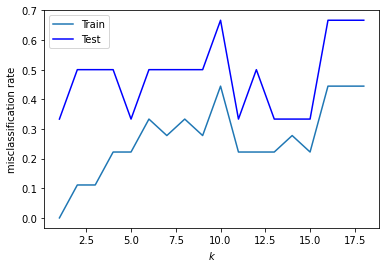

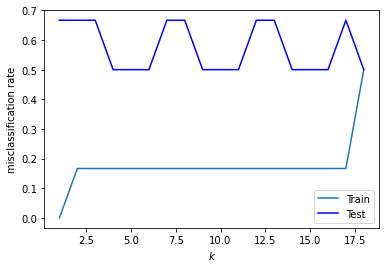

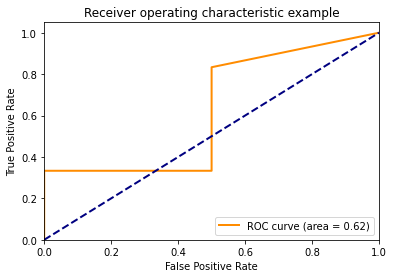

NameError: name 'train_pred' is not defined

In [20]:
data = pd.read_csv("RidingMowers.csv")
data.Ownership = data.Ownership.replace('Owner',1)
data.Ownership = data.Ownership.replace('Nonowner',0)

tr_df, test_df = train_test_split(data,test_size=0.25

                                  )

tr_mcr = []
test_mcr = []
kmax = 18
for k in range(1, kmax+1):
    neigh = KNeighborsClassifier(n_neighbors= k,metric = 'euclidean')
    neigh.fit(tr_df,tr_df.Ownership)
    tr_pred = neigh.predict(tr_df)
    test_pred = neigh.predict(test_df)
    tr_mcr.append(zero_one_loss(tr_df.Ownership, tr_pred))
    test_mcr.append(zero_one_loss(test_df.Ownership, test_pred))

xi = np.linspace(1, 18, 18)

plt.figure()
plt.plot(xi,tr_mcr,xi,test_mcr, 'b')
plt.legend(['Train','Test'])
plt.xlabel('$k$')
plt.ylabel('misclassification rate')
plt.show()

data = pd.read_csv("RidingMowers.csv")
data.Ownership = data.Ownership.replace('Owner',1)
data.Ownership = data.Ownership.replace('Nonowner',0)

tr_df, test_df = train_test_split(data,test_size=0.25

                                  )

tr_mcr = []
test_mcr = []
kmax = 18
for k in range(1, kmax+1):
    neigh = KNeighborsClassifier(n_neighbors= k,metric = 'euclidean')
    neigh.fit(tr_df,tr_df.Ownership)
    tr_pred = neigh.predict(tr_df)
    test_pred = neigh.predict(test_df)
    tr_mcr.append(zero_one_loss(tr_df.Ownership, tr_pred))
    test_mcr.append(zero_one_loss(test_df.Ownership, test_pred))

xi = np.linspace(1, 18, 18)

plt.figure()
plt.plot(xi,tr_mcr,xi,test_mcr, 'b')
plt.legend(['Train','Test'])
plt.xlabel('$k$')
plt.ylabel('misclassification rate')
plt.show()

# Cross-validation

k = 4
fold = 3
p = 1/fold

test_auc = []

# one iteration
tr_df, test_df = train_test_split(data, test_size=p)
neigh = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
neigh.fit(tr_df, tr_df.Ownership)
test_pred = neigh.predict_proba(test_df)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(np.array(test_df.Ownership), np.array(test_pred), pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# plot the KNN performance (ROC)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print(train_pred)
print(data.Ownership)

